In [2]:
# compute water flux for each water year of data

wateryears = np.arange(2002,2014)

for year in wateryears:

    rain = np.load('./data/rain_wy%s.npz'%(year))['arr_0']
    snowmelt = np.load('./data/snowmelt_wy%s.npz'%(year))['arr_0']
    
    wflux = rain+snowmelt # compute water flux as snowmelt + rainfall
    wflux[snowmelt<=0] = np.nan # Force cells where snowmelt is less than or equal to zero to nan
    wflux = np.nanmean(wflux,axis=0) # compute mean of the stack
    wflux[np.isnan(wflux)] = 0 # make the nan values zero
    
    rain[rain<=0] = np.nan
    rain = np.nanmean(rain,axis=0)
    rain[np.isnan(rain)] = 0
    
    snowmelt[snowmelt<=0] = np.nan
    snowmelt = np.nanmean(snowmelt,axis=0)
    snowmelt[np.isnan(snowmelt)] = 0
    
    np.save('./data/waterflux_wy%s.npy'%(year),wflux)
    np.save('./data/processedsnowmelt_wy%s.npy'%(year),snowmelt)
    np.save('./data/processedrain_wy%s.npy'%(year),rain)

    print year
    

2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013


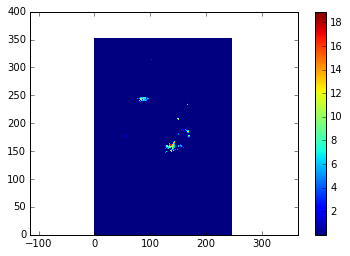

In [46]:
plt.pcolormesh(wflux,vmin=0.01,vmax=wflux.max())
plt.axis('equal')
plt.colorbar()